In [1]:
import pandas as pd

df = pd.read_csv('../../data/flight_data/flight_data.csv')
df.head(10)

,icao24,callsign,estdepartureairport,estarrivalairport,firstseen,lastseen,flight_duration,track
0,8963df,UAE135,OMDB,LIPZ,1735711201,1735732155,20954,"[array([ 1.73573215e+09, 4.54877278e+01, 1.2..."
1,aaa326,AAL124,NaN,KDFW,1735711202,1735735435,24233,"[array([ 1.73573543e+09, 3.28514953e+01, -9.7..."
2,868b50,ANA380,NaN,NaN,1735711203,1735716313,5110,"[array([1.73571631e+09, 3.51708674e+01, 1.3507..."
3,78080d,CQH6194,VTBD,NaN,1735711204,1735719171,7967,"[array([1.73571917e+09, 2.29406635e+01, 1.1444..."
4,78052f,CXA833,ZSAM,VTBS,1735711204,1735723919,12715,"[array([1.73572392e+09, 1.36619110e+01, 1.0072..."
5,800b30,AIC214,NaN,VIDP,1735711204,1735713142,1938,"[array([1.73571314e+09, 2.85390822e+01, 7.7103..."
6,4ca2d5,RYR7WA,LEAL,EHEH,1735711206,1735719539,8333,"[array([1.73571953e+09, 5.14545135e+01, 5.3794..."
7,780aa7,CRK237,NaN,VHHH,1735711212,1735716535,5323,"[array([ 1.73571653e+09, 2.23236237e+01, 1.1..."
8,4cadbe,RYR2NQ,EGGD,LHBP,1735711213,1735719449,8236,"[array([ 1.73571944e+09, 4.74261932e+01, 1.9..."
9,7c46e8,OAI,YBMC,YBMC,1735711214,1735712303,1089,"[array([ 1.73571230e+09, -2.65682831e+01, 1.5..."


(time: 1735732150, latitude: 45.487727795617054, longitude: 12.329540717892531, altitude: -304.8, heading: 42.04922, onground: False)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36761 entries, 0 to 36760
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   icao24               36761 non-null  object
 1   callsign             36730 non-null  object
 2   estdepartureairport  27386 non-null  object
 3   estarrivalairport    29657 non-null  object
 4   firstseen            36761 non-null  int64 
 5   lastseen             36761 non-null  int64 
 6   flight_duration      36761 non-null  int64 
 7   track                36761 non-null  object
dtypes: int64(3), object(5)
memory usage: 2.2+ MB


In [3]:
df.iloc[0]['track']

'[array([ 1.73573215e+09,  4.54877278e+01,  1.23295407e+01, -3.04800000e+02,\n         4.20492200e+01,  0.00000000e+00])\n array([ 1.73573213e+09,  4.54794880e+01,  1.23189563e+01, -3.04800000e+02,\n         4.17379650e+01,  0.00000000e+00])\n array([1.73573205e+09, 4.54430376e+01, 1.22721974e+01, 0.00000000e+00,\n        4.21087300e+01, 0.00000000e+00])\n array([1.73573199e+09, 4.54064941e+01, 1.22256252e+01, 3.04800000e+02,\n        4.14236640e+01, 0.00000000e+00])\n array([1.73573198e+09, 4.54026303e+01, 1.22208163e+01, 6.09600000e+02,\n        3.96022530e+01, 0.00000000e+00])\n array([1.73573198e+09, 4.54007263e+01, 1.22185625e+01, 6.09600000e+02,\n        3.75685920e+01, 0.00000000e+00])\n array([1.73573198e+09, 4.53995819e+01, 1.22173200e+01, 6.09600000e+02,\n        3.55376780e+01, 0.00000000e+00])\n array([1.73573197e+09, 4.53981628e+01, 1.22158160e+01, 6.09600000e+02,\n        3.32500150e+01, 0.00000000e+00])\n array([1.73573197e+09, 4.53973846e+01, 1.22150312e+01, 6.09600000e

In [4]:
import numpy as np
import pandas as pd
import ast
import re

def parse_track(track_str):
    """
    Given a track string where each state vector is represented as:
      array([number1, number2, number3, number4, number5, number6])
    and multiple state vectors are concatenated (possibly separated by newlines),
    this function returns a list of tuples where each tuple represents a state vector.

    Example input:
      '[array([ 1.73573215e+09,  4.54877278e+01,  1.23295407e+01, -3.04800000e+02,
               4.20492200e+01,  0.00000000e+00])
        array([ 1.73573213e+09,  4.54794880e+01,  1.23189563e+01, -3.04800000e+02,
               4.17379650e+01,  0.00000000e+00])
        ... ]'
    """
    # Using regex to find all patterns of the form array([...])
    matches = re.findall(r"array\(\[([^\]]+)\]\)", track_str)
    result = []
    for match in matches:
        # Remove any newlines and extra spaces, and then split on comma.
        # This yields a list of number strings.
        numbers_str_list = match.replace("\n", " ").split(',')
        try:
            # Convert each number string to a float and form a tuple.
            numbers_tuple = tuple(float(num.strip()) for num in numbers_str_list)
            result.append(numbers_tuple)
        except ValueError as e:
            print("Error converting numbers:", e)
            continue
    return result

def compute_track_metrics(track):
    """
    Given a track as a list/array of state vectors,
    compute aggregate metrics such as min, max, average for numeric fields,
    and convert the minimum and maximum times (start and end) into human readable datetime.
    
    Each state vector is assumed to be in the following order:
      [time, latitude, longitude, altitude, heading, onground]
    
    Returns a dictionary with the aggregate metrics.
    """
    # Ensure the track is not None and has data
    if not track or len(track) == 0:
        return None
    
    # If needed, convert track into a numpy array.
    # We use object dtype in case some values (like onground) are booleans.
    arr = np.array(track, dtype=object)
    
    # Separate out the values. We assume that time, latitude, longitude, altitude, heading are numeric.
    # onground is assumed to be boolean (or convertible to int).
    times = np.array([float(item) for item in arr[:, 0]])
    latitudes = np.array([float(item) for item in arr[:, 1]])
    longitudes = np.array([float(item) for item in arr[:, 2]])
    altitudes = np.array([float(item) for item in arr[:, 3]])
    headings = np.array([float(item) for item in arr[:, 4]])
    
    # For onground, we convert to int(0,1) to calculate a fraction True if needed.
    try:
        onground = np.array([int(item) for item in arr[:, 5]])
        onground_frac = onground.mean() * 100  # percentage of time that the flight was on ground
    except Exception:
        onground_frac = None
    
    metrics = {
        "time_min": times.min(),
        "time_max": times.max(),
        "time_avg": times.mean(),
        "latitude_min": latitudes.min(),
        "latitude_max": latitudes.max(),
        "latitude_avg": latitudes.mean(),
        "longitude_min": longitudes.min(),
        "longitude_max": longitudes.max(),
        "longitude_avg": longitudes.mean(),
        "altitude_min": altitudes.min(),
        "altitude_max": altitudes.max(),
        "altitude_avg": altitudes.mean(),
        "heading_min": headings.min(),
        "heading_max": headings.max(),
        "heading_avg": headings.mean(),
        "onground_percentage": onground_frac,
        # Convert Unix time to human readable datetime
        "start_time": pd.to_datetime(times.min(), unit="s"),
        "end_time": pd.to_datetime(times.max(), unit="s")
    }
    
    return metrics


In [5]:

# Example of applying this function to a single row from the DataFrame:
# (Assumes your CSV loaded the track column as something you can iterate over)
sample_row = df.iloc[0]
track_val = sample_row['track']
# If necessary, parse the track value if it's a string.
track_data = parse_track(track_val)
if track_data is not None:
    metrics = compute_track_metrics(track_data)
    print("Aggregated metrics for first flight track:")
    print(metrics)


Aggregated metrics for first flight track:
{'time_min': np.float64(1735711200.0), 'time_max': np.float64(1735732150.0), 'time_avg': np.float64(1735722079.5689654), 'latitude_min': np.float64(25.1404429), 'latitude_max': np.float64(45.4877278), 'latitude_avg': np.float64(35.97304212672414), 'longitude_min': np.float64(12.1860486), 'longitude_max': np.float64(55.4475403), 'longitude_avg': np.float64(33.47274912284483), 'altitude_min': np.float64(-304.8), 'altitude_max': np.float64(11582.4), 'altitude_avg': np.float64(4767.755172413794), 'heading_min': np.float64(2.7702157), 'heading_max': np.float64(357.1997), 'heading_avg': np.float64(239.93036702887932), 'onground_percentage': np.float64(0.0), 'start_time': Timestamp('2025-01-01 06:00:00'), 'end_time': Timestamp('2025-01-01 11:49:10')}


In [6]:

# If you want to compute the metrics for every row in your DataFrame,
# you can add a new column containing these metrics:
def apply_track_metrics(row):
    track_data = parse_track(row['track'])
    if track_data is not None:
        return compute_track_metrics(track_data)
    return None

df['track_metrics'] = df.apply(apply_track_metrics, axis=1)
print(df[['icao24', 'track_metrics']].head())

   icao24                                      track_metrics
0  8963df  {'time_min': 1735711200.0, 'time_max': 1735732...
1  aaa326  {'time_min': 1735711200.0, 'time_max': 1735735...
2  868b50  {'time_min': 1735711200.0, 'time_max': 1735716...
3  78080d  {'time_min': 1735711200.0, 'time_max': 1735719...
4  78052f  {'time_min': 1735711200.0, 'time_max': 1735723...


In [7]:
df.head()

,icao24,callsign,estdepartureairport,estarrivalairport,firstseen,lastseen,flight_duration,track,track_metrics
0,8963df,UAE135,OMDB,LIPZ,1735711201,1735732155,20954,"[array([ 1.73573215e+09, 4.54877278e+01, 1.2...","{'time_min': 1735711200.0, 'time_max': 1735732..."
1,aaa326,AAL124,NaN,KDFW,1735711202,1735735435,24233,"[array([ 1.73573543e+09, 3.28514953e+01, -9.7...","{'time_min': 1735711200.0, 'time_max': 1735735..."
2,868b50,ANA380,NaN,NaN,1735711203,1735716313,5110,"[array([1.73571631e+09, 3.51708674e+01, 1.3507...","{'time_min': 1735711200.0, 'time_max': 1735716..."
3,78080d,CQH6194,VTBD,NaN,1735711204,1735719171,7967,"[array([1.73571917e+09, 2.29406635e+01, 1.1444...","{'time_min': 1735711200.0, 'time_max': 1735719..."
4,78052f,CXA833,ZSAM,VTBS,1735711204,1735723919,12715,"[array([1.73572392e+09, 1.36619110e+01, 1.0072...","{'time_min': 1735711200.0, 'time_max': 1735723..."


In [8]:
# Expand the track_metrics column (which contains dictionaries) into separate columns
track_metrics_df = pd.json_normalize(df['track_metrics'])

# Concatenate the new columns with the original DataFrame
df = pd.concat([df, track_metrics_df], axis=1)

# Optionally, drop the original track_metrics column if it's no longer needed
df.drop(columns=['track_metrics'], inplace=True)

# Display the DataFrame with the new columns
print(df.head())

   icao24  callsign estdepartureairport estarrivalairport   firstseen  \
0  8963df  UAE135                  OMDB              LIPZ  1735711201   
1  aaa326  AAL124                   NaN              KDFW  1735711202   
2  868b50  ANA380                   NaN               NaN  1735711203   
3  78080d  CQH6194                 VTBD               NaN  1735711204   
4  78052f  CXA833                  ZSAM              VTBS  1735711204   

     lastseen  flight_duration  \
0  1735732155            20954   
1  1735735435            24233   
2  1735716313             5110   
3  1735719171             7967   
4  1735723919            12715   

                                               track      time_min  \
0  [array([ 1.73573215e+09,  4.54877278e+01,  1.2...  1.735711e+09   
1  [array([ 1.73573543e+09,  3.28514953e+01, -9.7...  1.735711e+09   
2  [array([1.73571631e+09, 3.51708674e+01, 1.3507...  1.735711e+09   
3  [array([1.73571917e+09, 2.29406635e+01, 1.1444...  1.735711e+09   
4  [ar

In [9]:
df.head()

,icao24,callsign,estdepartureairport,estarrivalairport,firstseen,lastseen,flight_duration,track,time_min,time_max,...,longitude_avg,altitude_min,altitude_max,altitude_avg,heading_min,heading_max,heading_avg,onground_percentage,start_time,end_time
0,8963df,UAE135,OMDB,LIPZ,1735711201,1735732155,20954,"[array([ 1.73573215e+09, 4.54877278e+01, 1.2...",1.735711e+09,1.735732e+09,...,33.472749,-304.8,11582.4,4767.755172,2.770216,357.19970,239.930367,0.000000,2025-01-01 06:00:00,2025-01-01 11:49:10
1,aaa326,AAL124,NaN,KDFW,1735711202,1735735435,24233,"[array([ 1.73573543e+09, 3.28514953e+01, -9.7...",1.735711e+09,1.735735e+09,...,-103.138302,0.0,11887.2,4241.636129,0.000000,359.62552,74.612923,0.000000,2025-01-01 06:00:00,2025-01-01 12:43:50
2,868b50,ANA380,NaN,NaN,1735711203,1735716313,5110,"[array([1.73571631e+09, 3.51708674e+01, 1.3507...",1.735711e+09,1.735716e+09,...,138.807698,2743.2,11582.4,9701.813592,NaN,NaN,NaN,0.000000,2025-01-01 06:00:00,2025-01-01 07:25:10
3,78080d,CQH6194,VTBD,NaN,1735711204,1735719171,7967,"[array([1.73571917e+09, 2.29406635e+01, 1.1444...",1.735711e+09,1.735719e+09,...,101.321667,0.0,11277.6,4630.479070,46.315903,251.63918,131.633184,0.000000,2025-01-01 06:00:00,2025-01-01 08:12:50
4,78052f,CXA833,ZSAM,VTBS,1735711204,1735723919,12715,"[array([1.73572392e+09, 1.36619110e+01, 1.0072...",1.735711e+09,1.735724e+09,...,104.518985,-304.8,10363.2,2706.413793,NaN,NaN,NaN,4.137931,2025-01-01 06:00:00,2025-01-01 09:32:00


In [10]:
# drop track column
df.drop(columns=['track'], inplace=True)
df.head()


,icao24,callsign,estdepartureairport,estarrivalairport,firstseen,lastseen,flight_duration,time_min,time_max,time_avg,...,longitude_avg,altitude_min,altitude_max,altitude_avg,heading_min,heading_max,heading_avg,onground_percentage,start_time,end_time
0,8963df,UAE135,OMDB,LIPZ,1735711201,1735732155,20954,1.735711e+09,1.735732e+09,1.735722e+09,...,33.472749,-304.8,11582.4,4767.755172,2.770216,357.19970,239.930367,0.000000,2025-01-01 06:00:00,2025-01-01 11:49:10
1,aaa326,AAL124,NaN,KDFW,1735711202,1735735435,24233,1.735711e+09,1.735735e+09,1.735733e+09,...,-103.138302,0.0,11887.2,4241.636129,0.000000,359.62552,74.612923,0.000000,2025-01-01 06:00:00,2025-01-01 12:43:50
2,868b50,ANA380,NaN,NaN,1735711203,1735716313,5110,1.735711e+09,1.735716e+09,1.735713e+09,...,138.807698,2743.2,11582.4,9701.813592,NaN,NaN,NaN,0.000000,2025-01-01 06:00:00,2025-01-01 07:25:10
3,78080d,CQH6194,VTBD,NaN,1735711204,1735719171,7967,1.735711e+09,1.735719e+09,1.735712e+09,...,101.321667,0.0,11277.6,4630.479070,46.315903,251.63918,131.633184,0.000000,2025-01-01 06:00:00,2025-01-01 08:12:50
4,78052f,CXA833,ZSAM,VTBS,1735711204,1735723919,12715,1.735711e+09,1.735724e+09,1.735721e+09,...,104.518985,-304.8,10363.2,2706.413793,NaN,NaN,NaN,4.137931,2025-01-01 06:00:00,2025-01-01 09:32:00


In [11]:

# save to csv
df.to_csv('../../data/flight_data/flight_data_with_metrics.csv', index=False)

# save a sample of the dataframe
df.sample(1000).to_csv('../../data/flight_data/flight_data_sample.csv', index=False)


## EDA on flight data with metrics

In [14]:
# read in

df = pd.read_csv("../../samples/flight_data_with_metrics.csv")

In [15]:
# Get unique airports from departure and arrival columns
departure_airports = set(df['estdepartureairport'].dropna().unique())
arrival_airports = set(df['estarrivalairport'].dropna().unique())

# Find intersection of airports that appear in both columns
common_airports = departure_airports.intersection(arrival_airports)

print(f"Number of unique departure airports: {len(departure_airports)}")
print(f"Number of unique arrival airports: {len(arrival_airports)}")
print(f"Number of airports that appear as both departure and arrival: {len(common_airports)}")


Number of unique departure airports: 2051
Number of unique arrival airports: 2659
Number of airports that appear as both departure and arrival: 1484


In [16]:
# lets find the interval of the dataset from min time to max time
min_time = pd.to_datetime(df['time_min'].min(), unit='s')
max_time = pd.to_datetime(df['time_max'].max(), unit='s')

print(f"Interval of the dataset: {min_time} to {max_time}")


Interval of the dataset: 2025-01-01 05:00:00 to 2025-01-01 22:59:50


In [17]:
# Look at basic statistics
print("Flight Duration Statistics (in minutes):")
print(df['flight_duration'].describe(), "\n")

print("Average Altitude Statistics:")
print(df['altitude_avg'].describe(), "\n")

print("Average Heading Statistics:")
print(df['heading_avg'].describe(), "\n")


Flight Duration Statistics (in minutes):
count    36761.000000
mean      6788.854112
std       6979.962998
min        601.000000
25%       2375.000000
50%       4668.000000
75%       8589.000000
max      63640.000000
Name: flight_duration, dtype: float64 

Average Altitude Statistics:
count    36761.000000
mean      4285.430222
std       2355.013639
min       -304.800000
25%       2817.125373
50%       4084.506422
75%       5653.268354
max      12496.800000
Name: altitude_avg, dtype: float64 

Average Heading Statistics:
count    31564.000000
mean       186.228418
std         69.846515
min          0.000000
25%        132.810687
50%        185.491822
75%        239.341677
max        359.156966
Name: heading_avg, dtype: float64 



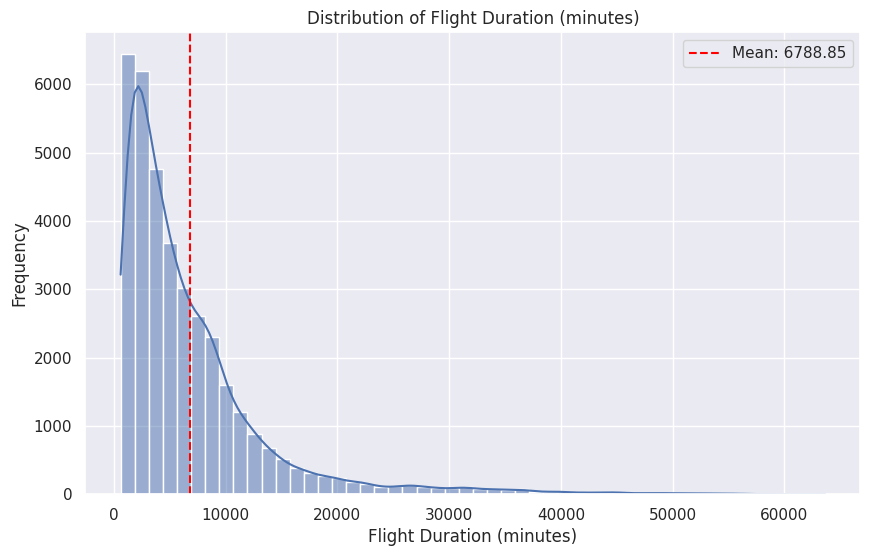

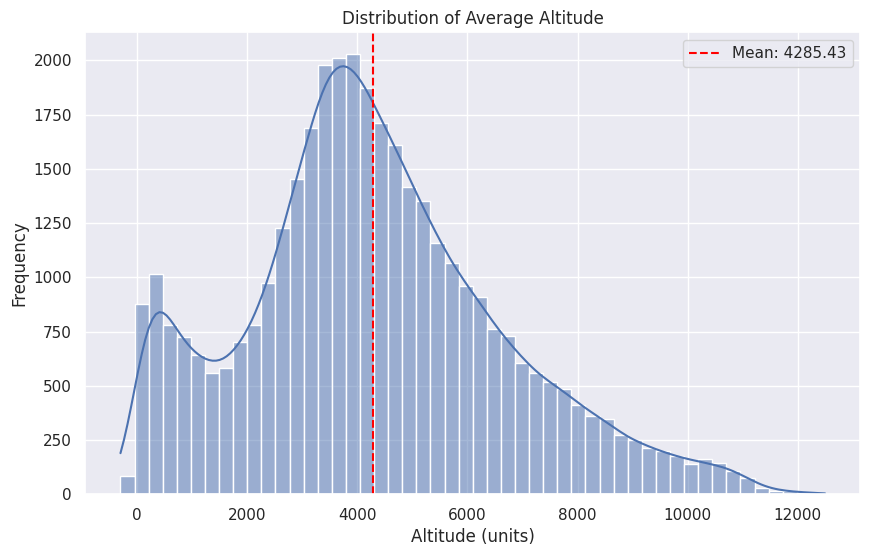

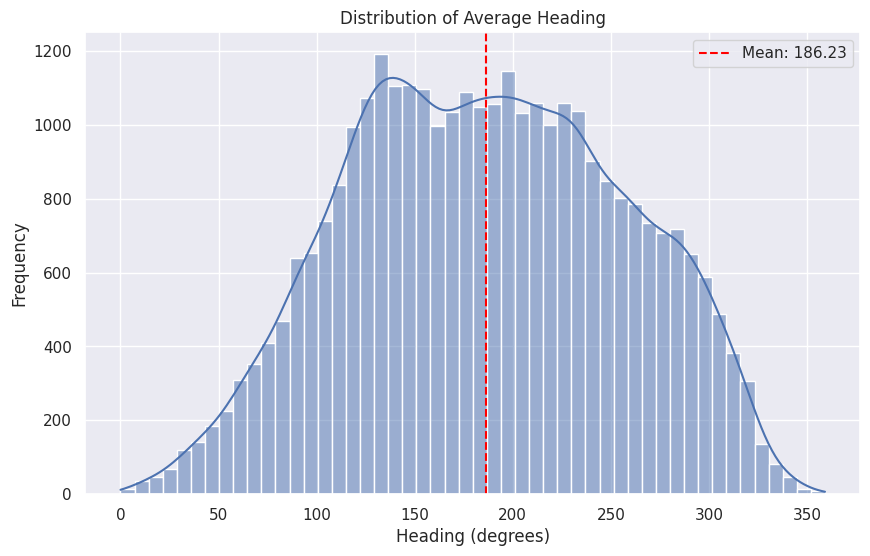

In [20]:

# Import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Optionally set a plot theme
sns.set_theme(style="darkgrid")

# Define a function to plot a distribution with both a histogram and KDE
def plot_distribution(column, title, xlabel):
    plt.figure(figsize=(10, 6))
    data = df[column].dropna()
    sns.histplot(data, kde=True, bins=50)
    mean = data.mean()
    plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

# Plot the distribution of flight duration
plot_distribution("flight_duration", "Distribution of Flight Duration (minutes)", "Flight Duration (minutes)")

# Plot the distribution of average altitude
plot_distribution("altitude_avg", "Distribution of Average Altitude", "Altitude (units)")

# Plot the distribution of average heading
plot_distribution("heading_avg", "Distribution of Average Heading", "Heading (degrees)")

Analysis of Flight Heading Distribution
-------------------------------------
- Mean heading of 186.23° shows flights trend southward (slightly west of south)
- Roughly symmetrical distribution indicates:
  - Flights traveling in multiple directions
  - Possible peaks along major air corridors
- Even spread of headings aligns with expected global flight patterns

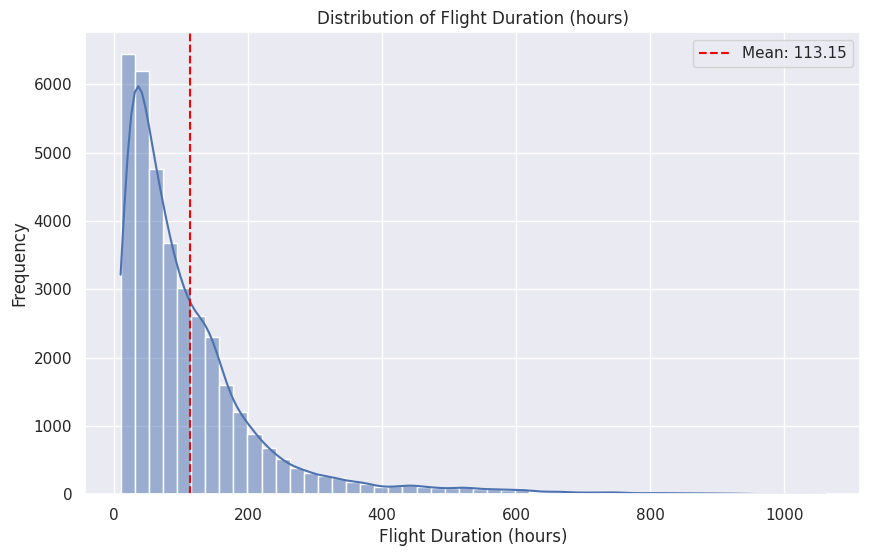

In [21]:
# create coinvert flight duration to hours
df['flight_duration_hours'] = df['flight_duration'] / 60

# Plot the distribution of flight duration in hours
plot_distribution("flight_duration_hours", "Distribution of Flight Duration (hours)", "Flight Duration (hours)")

In [30]:
df['time_diff'] = (df.time_max - df.time_min) / 3600

df.time_diff.describe()

count    36761.000000
mean         1.873688
std          1.913339
min          0.005556
25%          0.658333
50%          1.294444
75%          2.380556
max         17.677778
Name: time_diff, dtype: float64

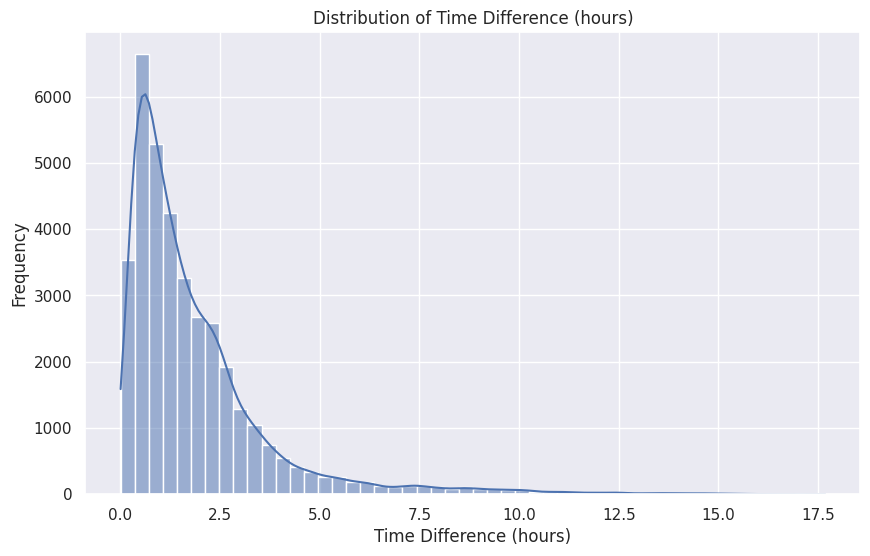

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(df.time_diff, kde=True, bins=50)
plt.title("Distribution of Time Difference (hours)")
plt.xlabel("Time Difference (hours)")
plt.ylabel("Frequency")
plt.show()


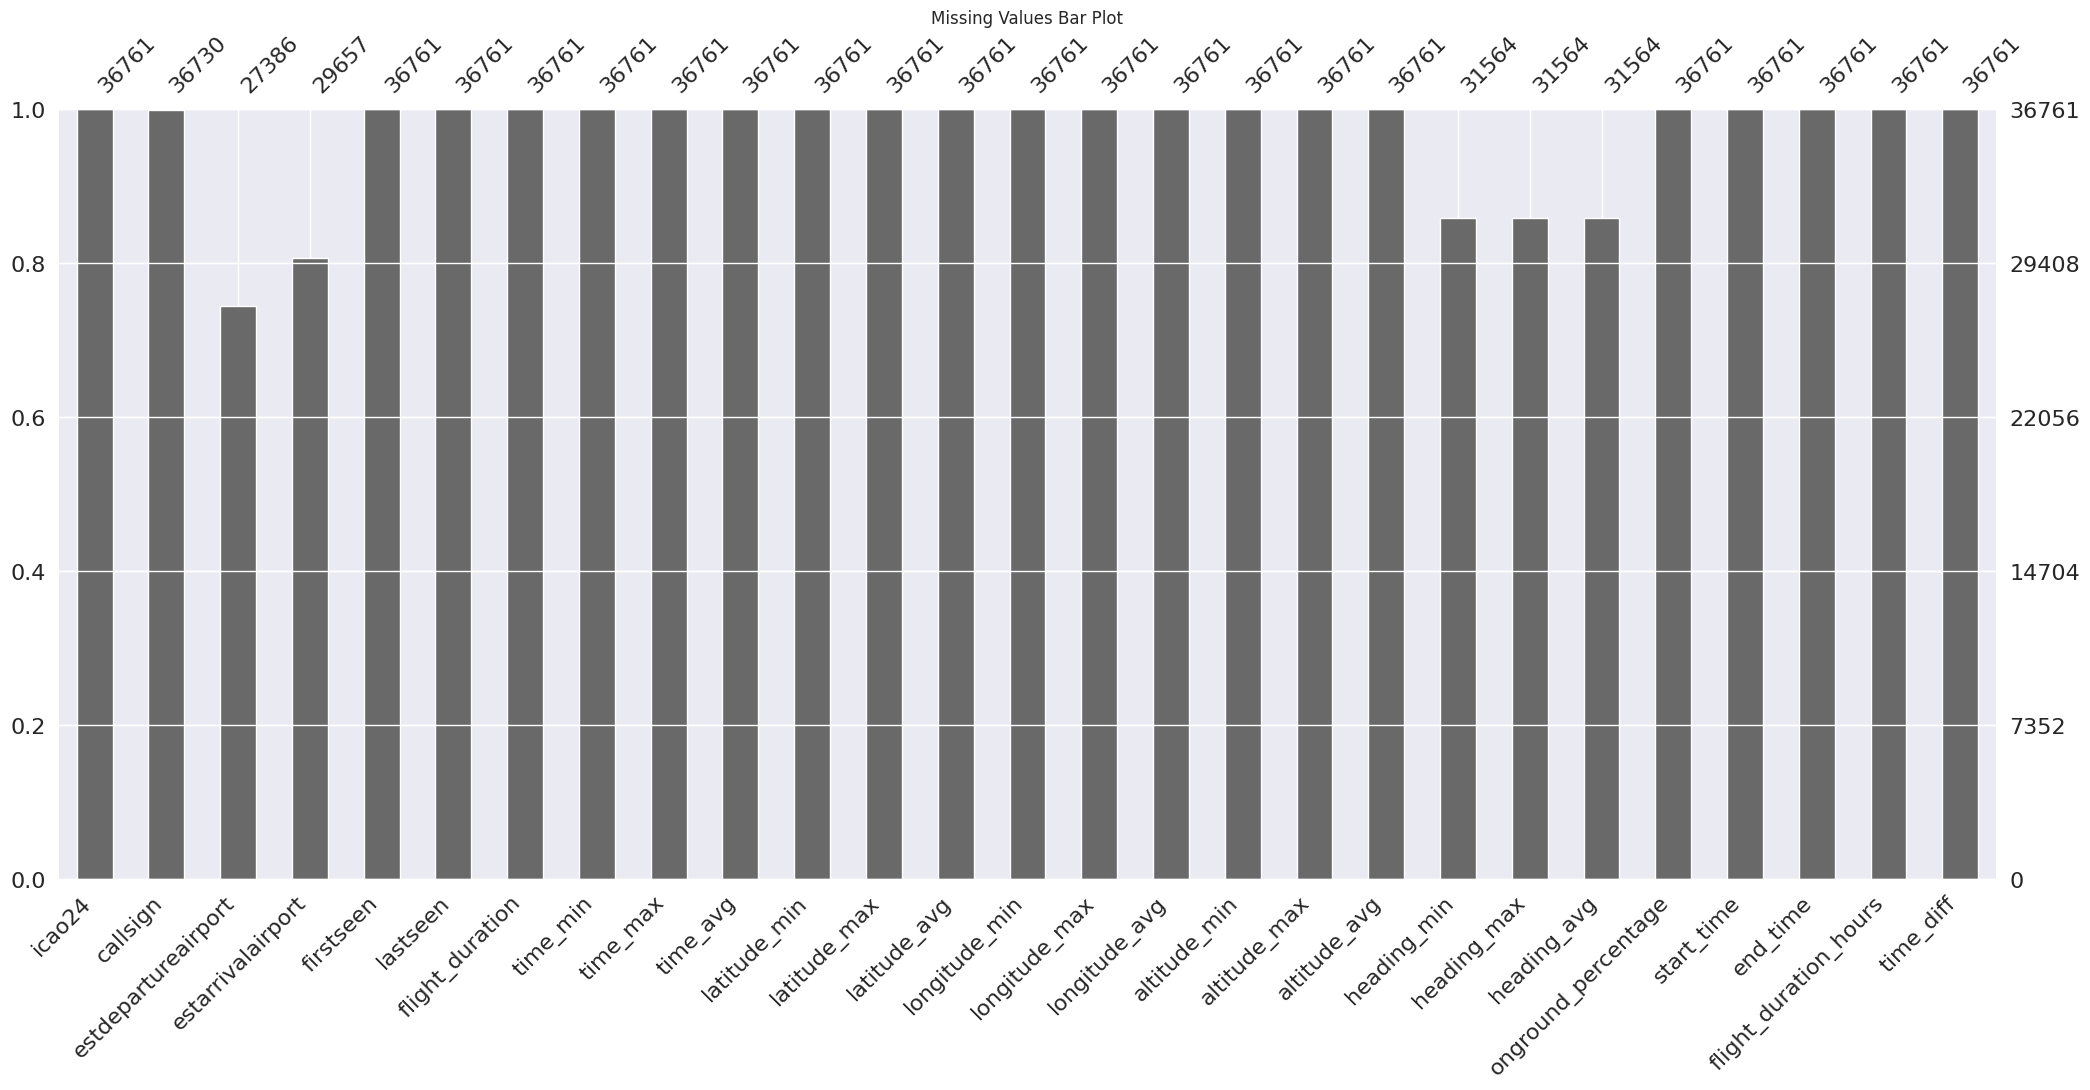

In [37]:
# Missing value analysis
import missingno as msno

plt.figure(figsize=(12, 6))
msno.bar(df)
plt.title("Missing Values Bar Plot")
plt.show()


<Axes: >

<Figure size 1200x600 with 0 Axes>

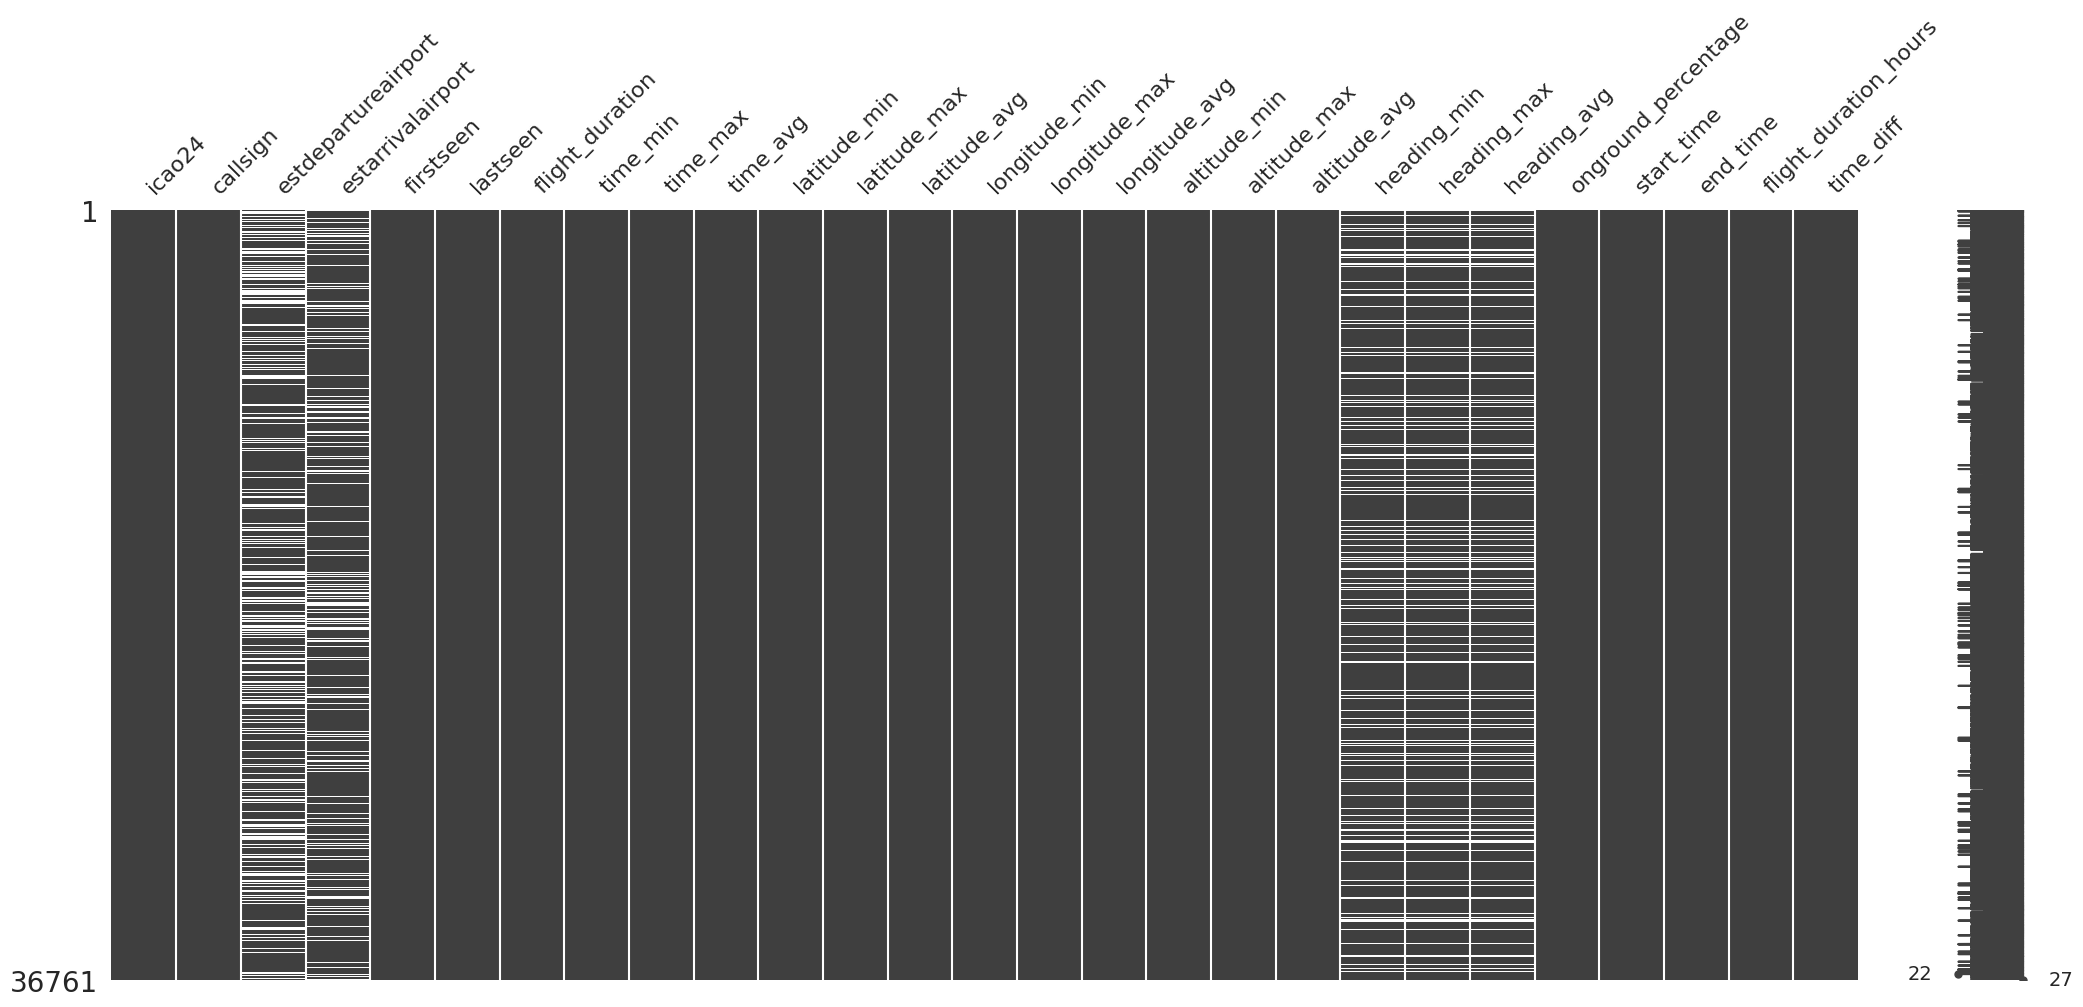

In [39]:
plt.figure(figsize=(12, 6))
msno.matrix(df)

<Figure size 1200x600 with 0 Axes>

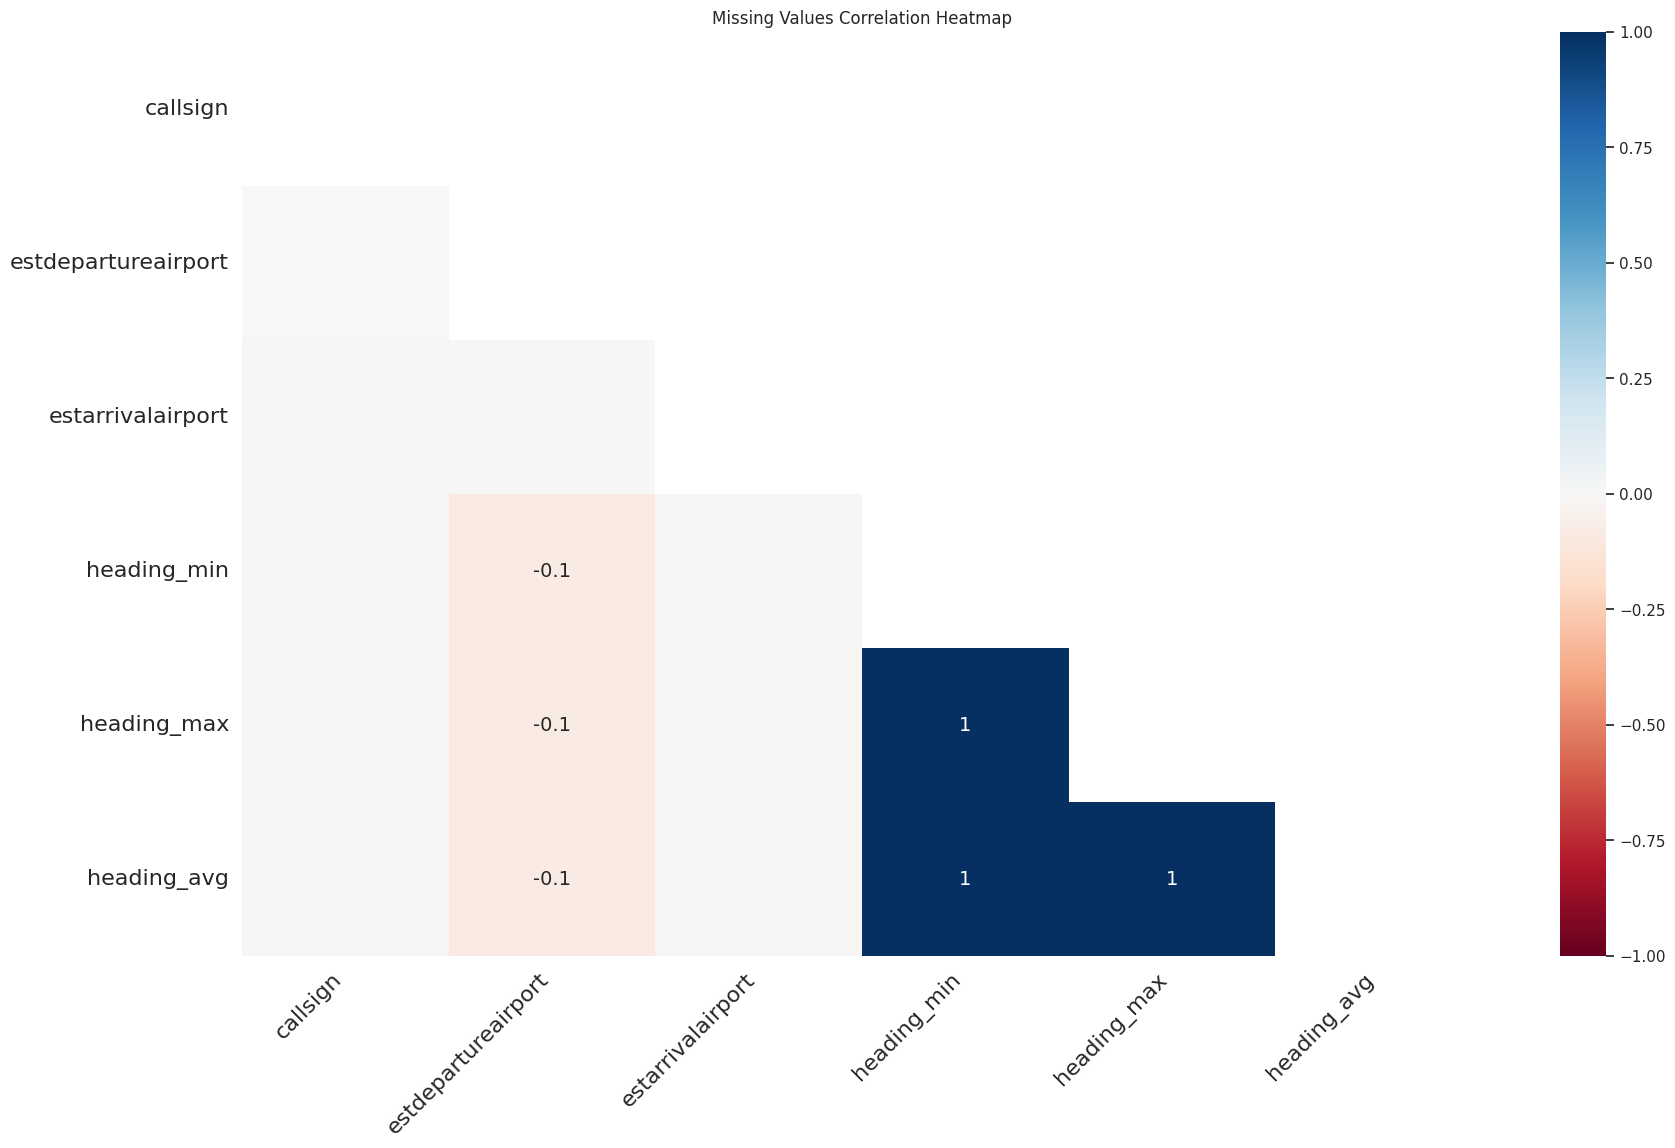

In [38]:

plt.figure(figsize=(12, 6)) 
msno.heatmap(df)
plt.title("Missing Values Correlation Heatmap")
plt.show()

In [ ]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

# Create additional time-based columns for grouping
df['date'] = df['start_time'].dt.date
df['day_of_week'] = df['start_time'].dt.day_name()
df['hour_of_day'] = df['start_time'].dt.hour
df['month'] = df['start_time'].dt.to_period('M')  # Using periods for monthly grouping


In [44]:

# ------------------
# Grouping by Hour of Day
# ------------------
hourly_stats = df.groupby('hour_of_day').agg({
    'time_diff': 'mean',
    'altitude_avg': 'mean',
    'onground_percentage': 'mean'
}).reset_index()


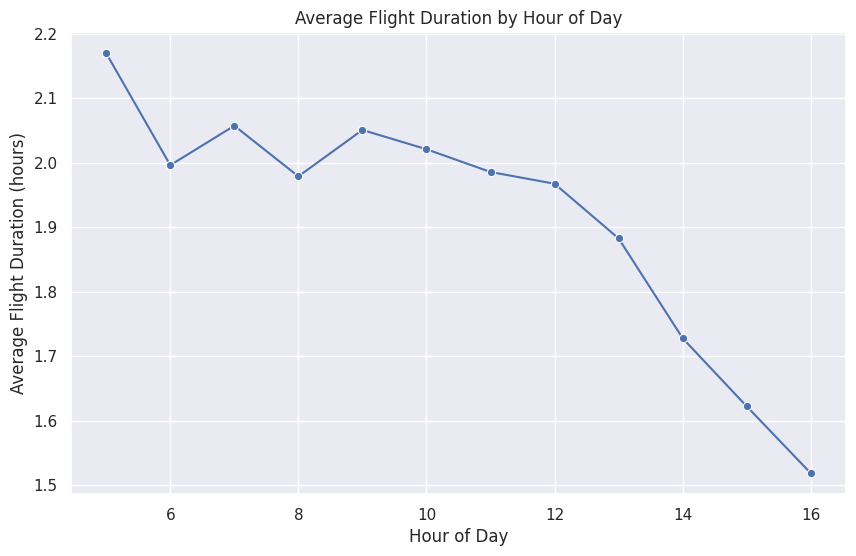

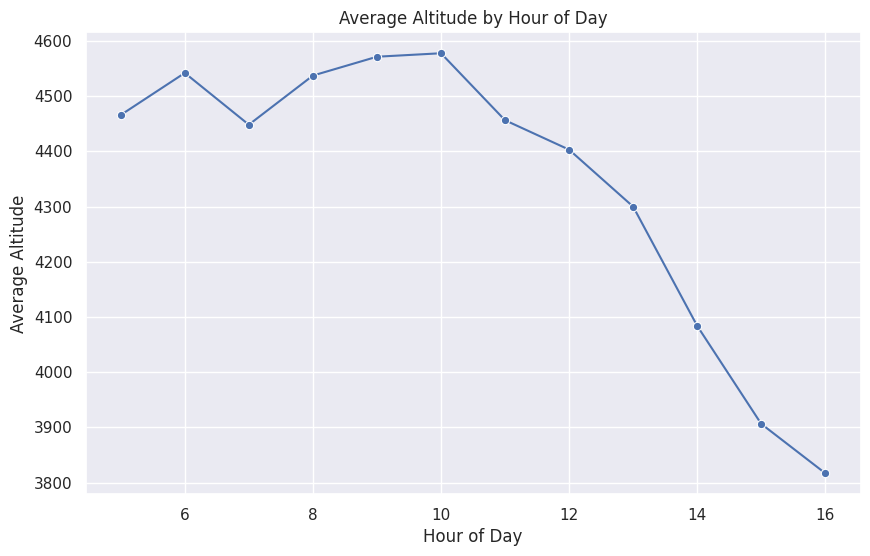

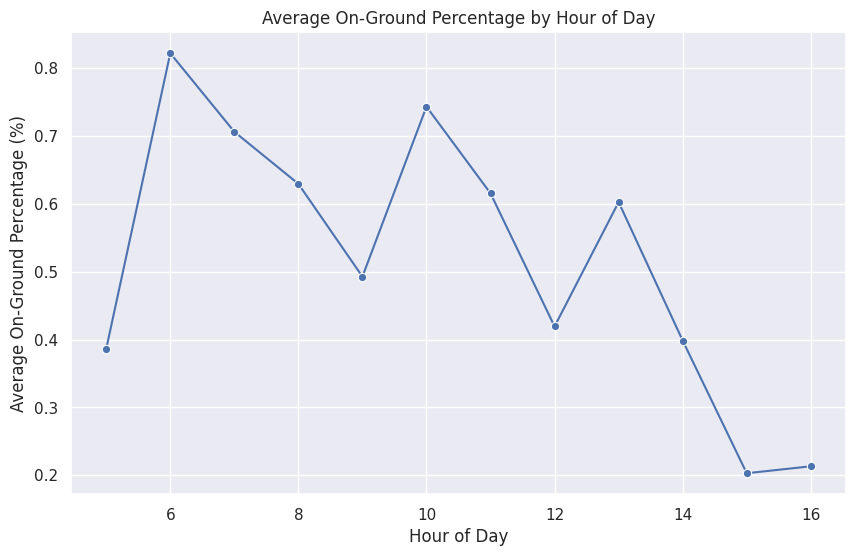

In [46]:

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_stats, x='hour_of_day', y='time_diff', marker='o')
plt.title("Average Flight Duration by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average Flight Duration (hours)")
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_stats, x='hour_of_day', y='altitude_avg', marker='o')
plt.title("Average Altitude by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average Altitude")
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_stats, x='hour_of_day', y='onground_percentage', marker='o')
plt.title("Average On-Ground Percentage by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average On-Ground Percentage (%)")
plt.show()


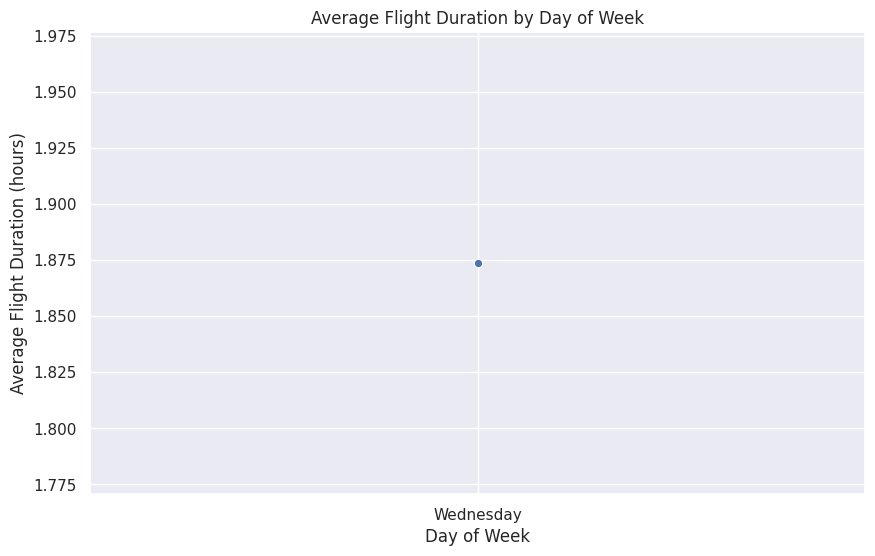

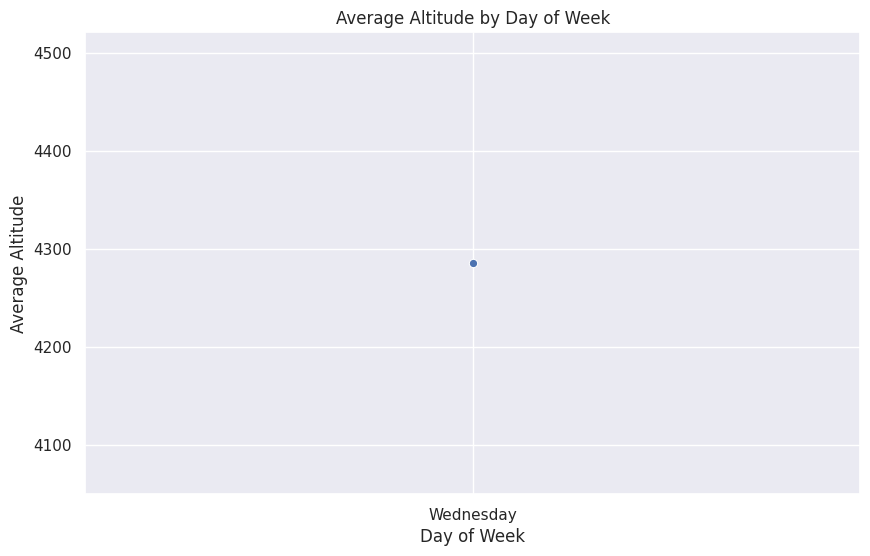

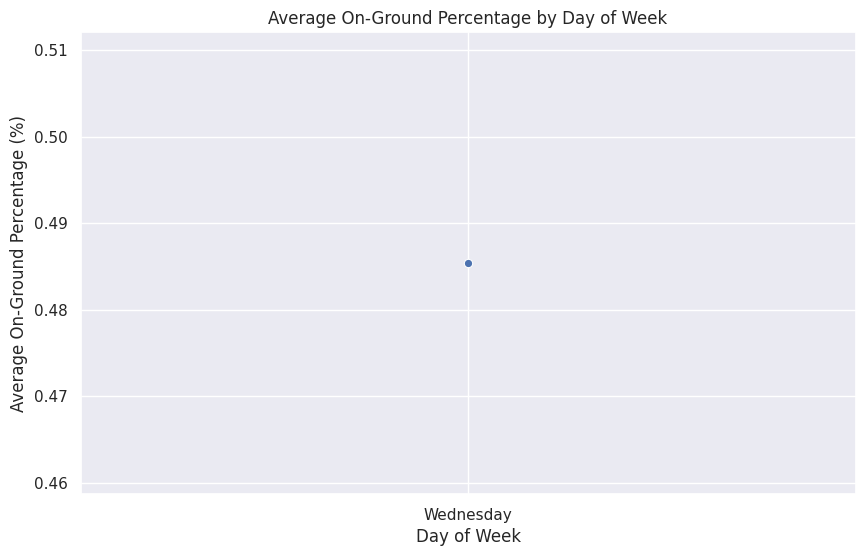

In [48]:

# ------------------
# Grouping by Day of Week
# ------------------
# To ensure that days are plotted in order, define the correct day order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_stats = df.groupby('day_of_week').agg({
    'time_diff': 'mean',
    'altitude_avg': 'mean',
    'onground_percentage': 'mean'
}).reindex(day_order).reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=day_stats, x='day_of_week', y='time_diff', marker='o')
plt.title("Average Flight Duration by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Average Flight Duration (hours)")
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(data=day_stats, x='day_of_week', y='altitude_avg', marker='o')
plt.title("Average Altitude by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Average Altitude")
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(data=day_stats, x='day_of_week', y='onground_percentage', marker='o')
plt.title("Average On-Ground Percentage by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Average On-Ground Percentage (%)")
plt.show()


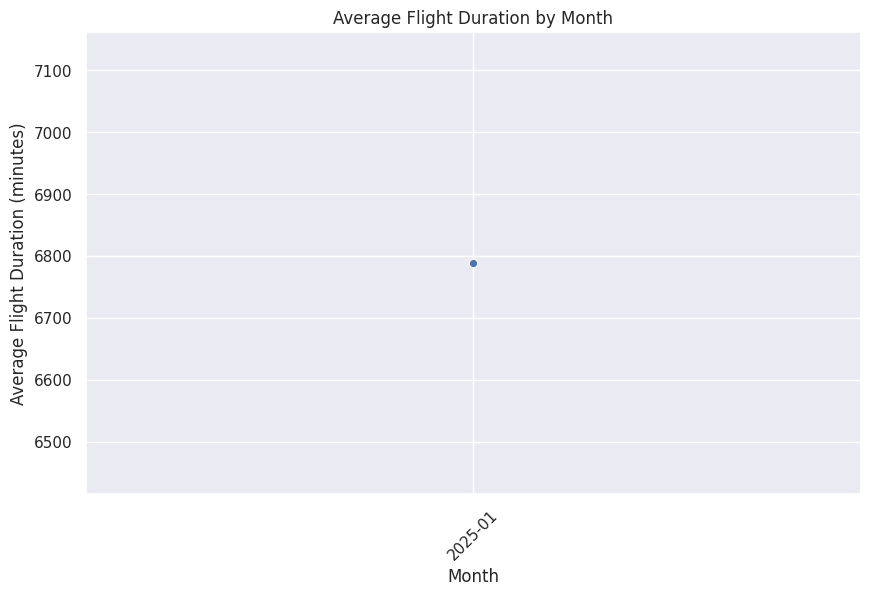

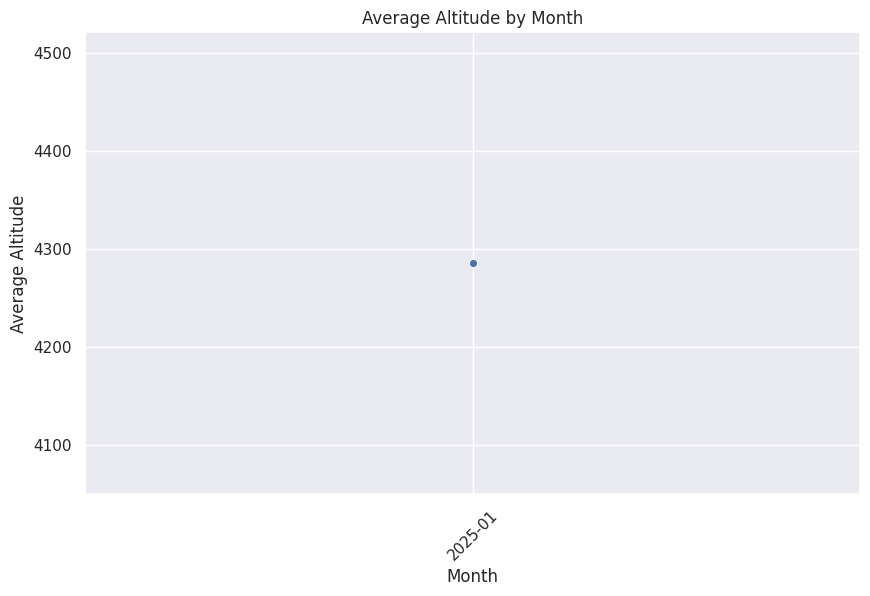

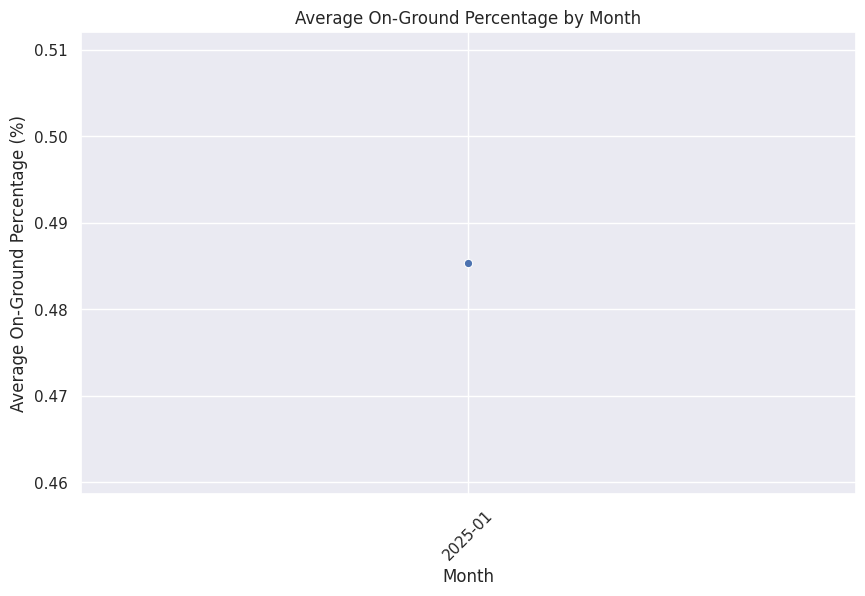

In [49]:

# ------------------
# Grouping by Month
# ------------------
monthly_stats = df.groupby('month').agg({
    'flight_duration': 'mean',
    'altitude_avg': 'mean',
    'onground_percentage': 'mean'
}).reset_index()

# Convert month period to string for a nicer x-axis
monthly_stats['month_str'] = monthly_stats['month'].astype(str)

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_stats, x='month_str', y='flight_duration', marker='o')
plt.title("Average Flight Duration by Month")
plt.xlabel("Month")
plt.ylabel("Average Flight Duration (minutes)")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_stats, x='month_str', y='altitude_avg', marker='o')
plt.title("Average Altitude by Month")
plt.xlabel("Month")
plt.ylabel("Average Altitude")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_stats, x='month_str', y='onground_percentage', marker='o')
plt.title("Average On-Ground Percentage by Month")
plt.xlabel("Month")
plt.ylabel("Average On-Ground Percentage (%)")
plt.xticks(rotation=45)
plt.show()